##### Installation/ importation des packages nécessaires 

In [1]:
pip install pandas numpy matplotlib ydata_profiling optuna seaborn scikit-learn plotly sweetviz

ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7, <3.11; 4.1.0 Requires-Python >=3.7, <3.12; 4.1.1 Requires-Python >=3.7, <3.12; 4.1.2 Requires-Python >=3.7, <3.12; 4.10.0 Requires-Python <3.13,>=3.7; 4.11.0 Requires-Python <3.13,>=3.7; 4.12.0 Requires-Python <3.13,>=3.7; 4.2.0 Requires-Python >=3.7, <3.12; 4.3.0 Requires-Python >=3.7, <3.12; 4.3.1 Requires-Python >=3.7, <3.12; 4.3.2 Requires-Python >=3.7, <3.12; 4.4.0 Requires-Python >=3.7, <3.12; 4.5.0 Requires-Python >=3.7, <3.12; 4.5.1 Requires-Python >=3.7, <3.12; 4.6.0 Requires-Python >=3.7, <3.12; 4.6.1 Requires-Python >=3.7, <3.12; 4.6.2 Requires-Python >=3.7, <3.12; 4.6.3 Requires-Python >=3.7, <3.12; 4.6.4 Requires-Python >=3.7, <3.12; 4.6.5 Requires-Python >=3.7, <3.12; 4.7.0 Requires-Python >=3.7, <3.13; 4.8.3 Requires-Python <3.13,>=3.7; 4.9.0 Requires-Python <3.13,>=3.7
ERROR: Could not find a version that satisfies the requirement ydata_profiling (from versions: n

In [2]:
pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import nbformat

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,  recall_score, f1_score, precision_score
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier  
from sklearn.datasets import make_classification

from scipy.stats import chi2_contingency

import optuna



c:\Users\nourn\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### Récupération du dataset

In [9]:
df_satisfaction=pd.read_csv('df_satisfaction.csv')

In [5]:
df_satisfaction.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df_satisfaction.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# **EDA** 

##### Vue d'ensemble des données 

In [7]:
# Premières lignes du dataset
display(df_satisfaction.head())

# Taille du dataset
display(df_satisfaction.shape)

# Aperçu du dataset
display(df_satisfaction.info())


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


(129880, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

None

##### Statistiques

In [8]:
# Pour les colonnes numériques
display(df_satisfaction.describe())

# Pour les colonnes catégorielles
display(df_satisfaction.describe(include='object'))


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


##### Détection et suppression des valeurs manquantes

In [9]:
# Valeurs manquantes par colonne
print(df_satisfaction.isna().sum())


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [10]:
missing_percentage = df_satisfaction['Arrival Delay in Minutes'].isnull().mean() * 100
print(f"Pourcentage de valeurs manquantes dans 'Arrival Delay in Minutes' : {missing_percentage:.2f}%")

Pourcentage de valeurs manquantes dans 'Arrival Delay in Minutes' : 0.30%


###### La colonne n'a pas d'incidence et ne permet pas à aider à définir la satisfaction des passager, nous allons donc supprimer la colonne associée

In [11]:
df_clean_satisfaction= df_satisfaction.dropna()

##### Analyses variées

- ###### Distribution des variables numériques

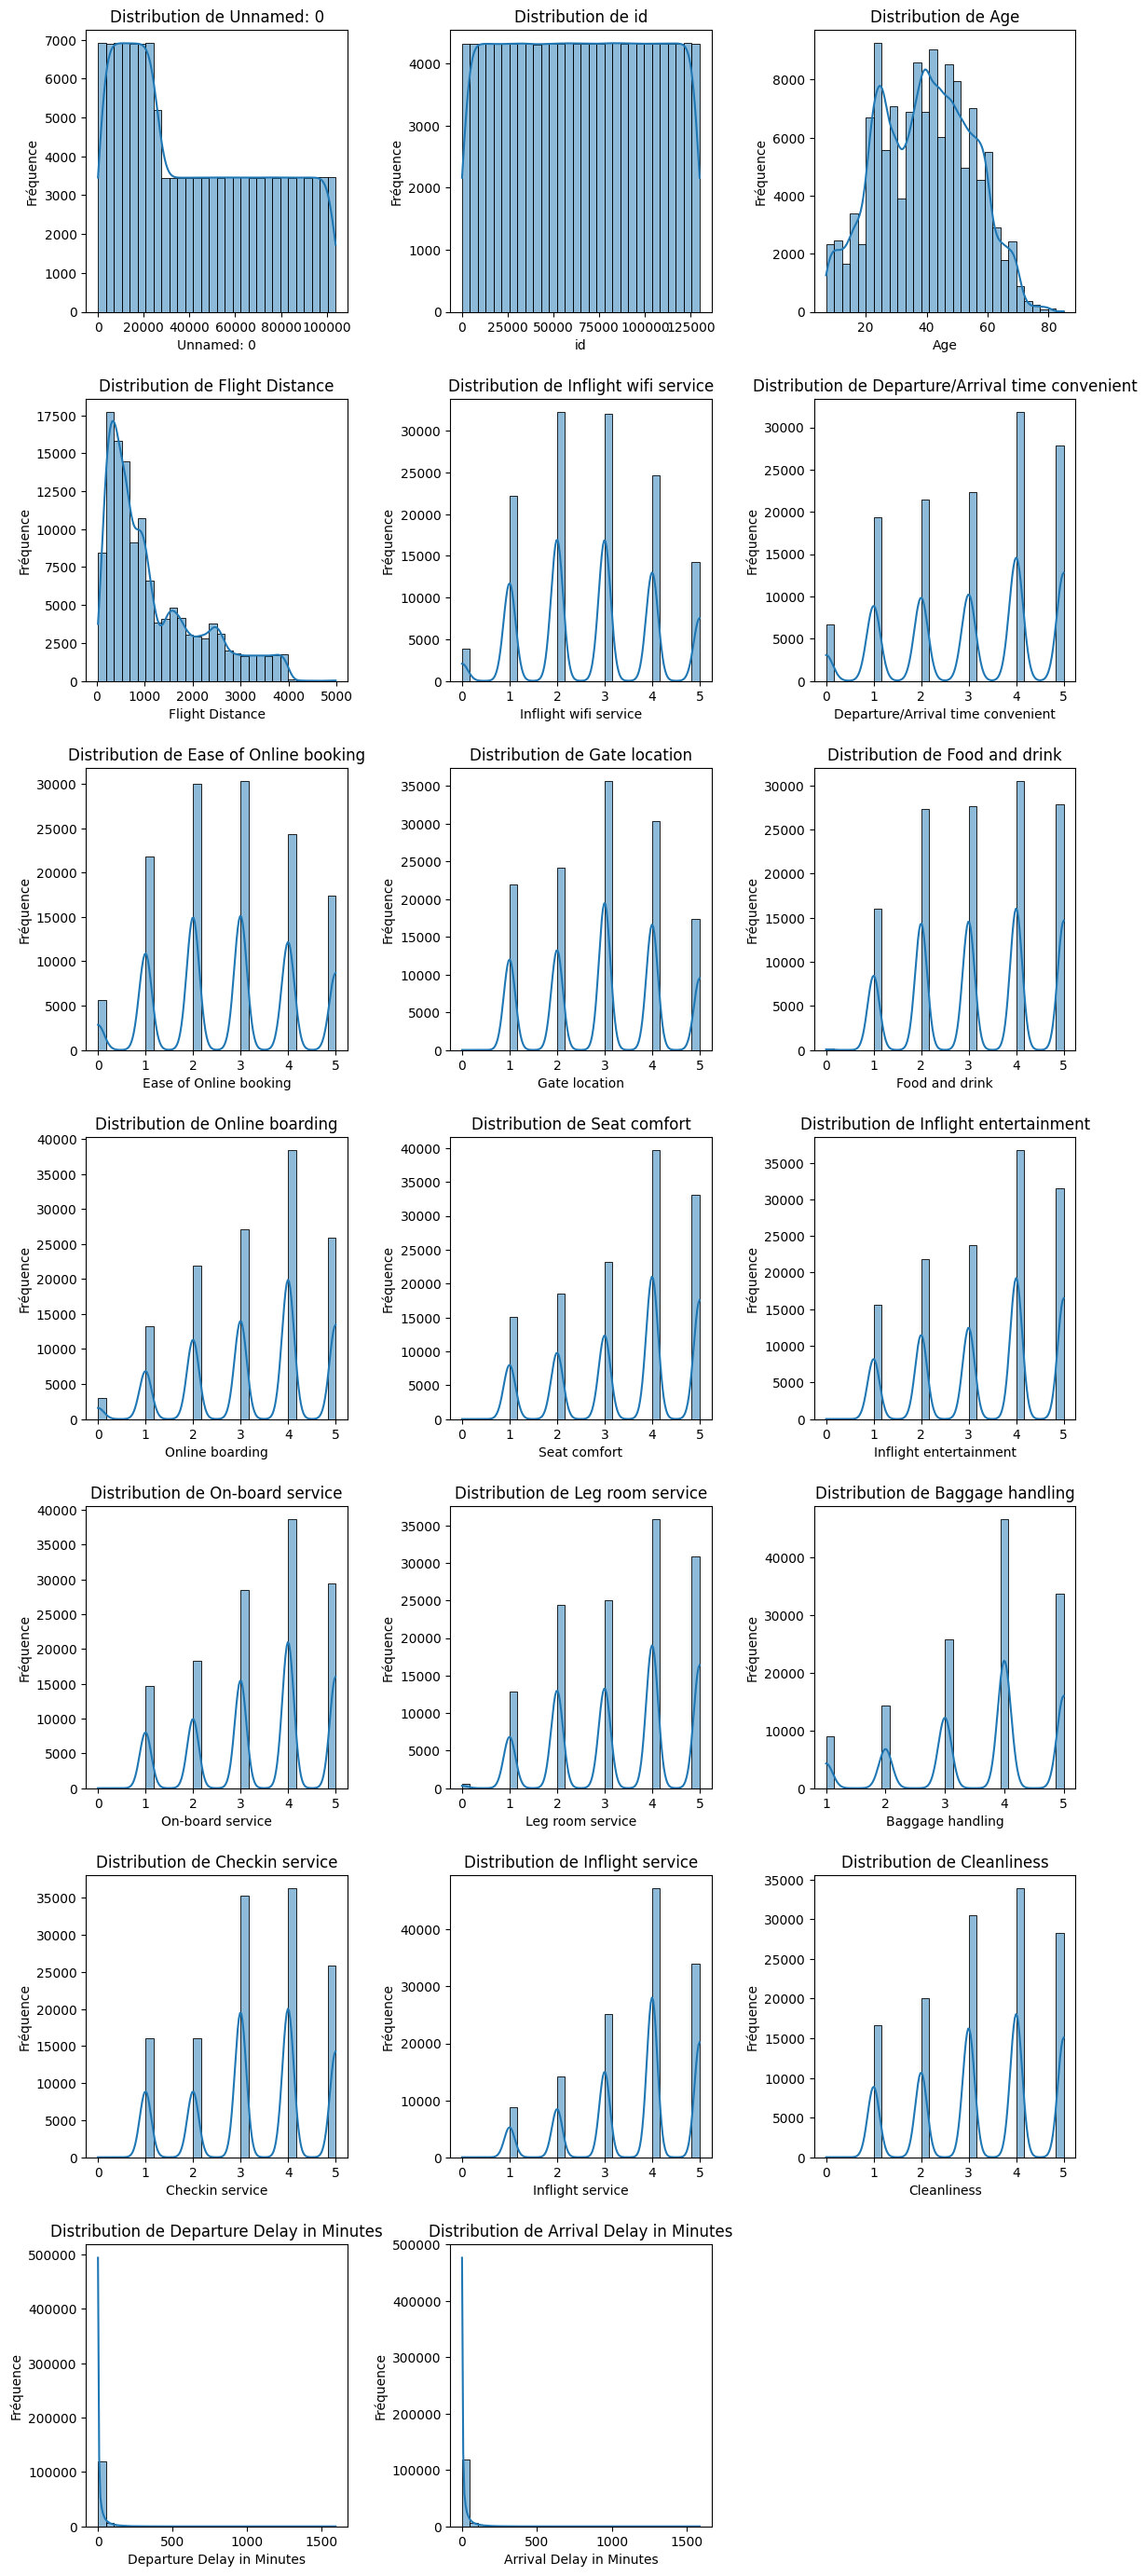

In [ ]:
numerical_cols = df_clean_satisfaction.select_dtypes(include='number').columns.tolist()


num_vars = len(numerical_cols)
n_cols = 3  
n_rows = (num_vars // n_cols) + (num_vars % n_cols > 0)  # Nombre de lignes nécessaires

# 3. Visualisation des distributions des variables numériques
plt.figure(figsize=(12, 4 * n_rows)) 
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(n_rows, n_cols, i)  
    sns.histplot(df_clean_satisfaction[col], bins=30, kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

# Ajustement des espacements pour éviter le chevauchement
plt.tight_layout(pad=2.0) 
plt.show()


###### On utilise le label encoder pour convertir les valeurs de la colonne 'satisfaction' 

In [ ]:
import pandas as pd
#from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_clean_satisfaction['satisfaction'] = label_encoder.fit_transform(df_clean_satisfaction['satisfaction'])

C:\Users\nourn\AppData\Local\Temp\ipykernel_1984\2086528314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_satisfaction['satisfaction'] = label_encoder.fit_transform(df_clean_satisfaction['satisfaction'])


- ###### Matrice de corrélation

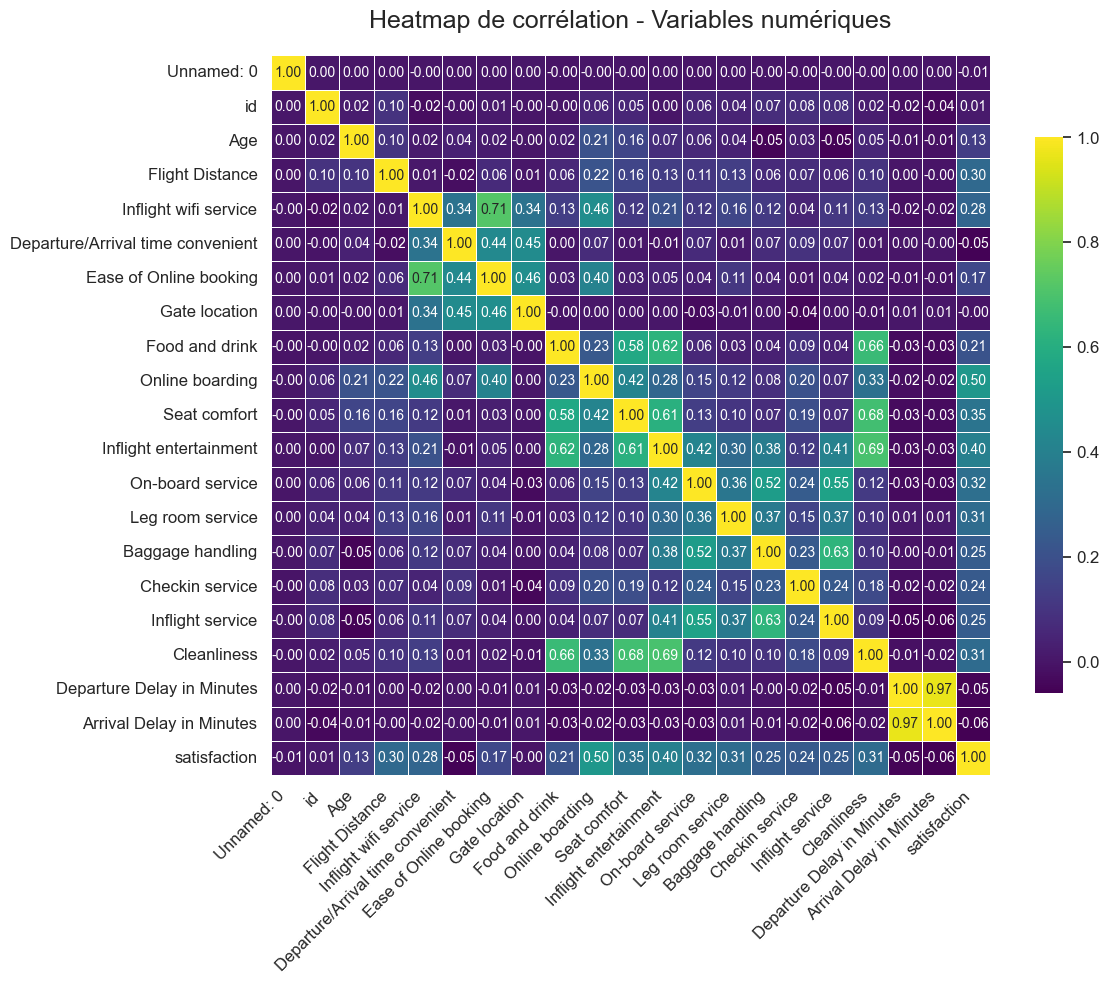

In [ ]:
numerical_cols = df_clean_satisfaction.select_dtypes(include=['number']).columns
df_numerical = df_clean_satisfaction[numerical_cols] 
#2. Calcul de la matrice de corrélation
corr_matrix = df_numerical.corr()

# 3. Personnalisation de la heatmap
plt.figure(figsize=(12, 10)) 
sns.set(font_scale=1.1) 

# Créer la heatmap avec des annotations, une palette plus dynamique et un fond plus élégant
sns.heatmap(corr_matrix, 
            annot=True,         
            fmt=".2f",          
            cmap='viridis',    
            linewidths=0.5,     
            square=True,        
            cbar_kws={"shrink": .75},  
            annot_kws={"size": 10})    

# 4. Titre et ajustements esthétiques
plt.title('Heatmap de corrélation - Variables numériques', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=12) 
plt.yticks(fontsize=12)

# 5. Afficher la heatmap
plt.tight_layout()  # Ajuster automatiquement les marges
plt.show()

###### Corélation de Cramer's des variabbles numériques vis à vis de la variable 'satisfaction'

In [ ]:
numerical_cols = df_clean_satisfaction.select_dtypes(include='number').columns.tolist()

C:\Users\nourn\AppData\Local\Temp\ipykernel_1984\448617494.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Variable', y='Corrélation de Pearson', palette='coolwarm')


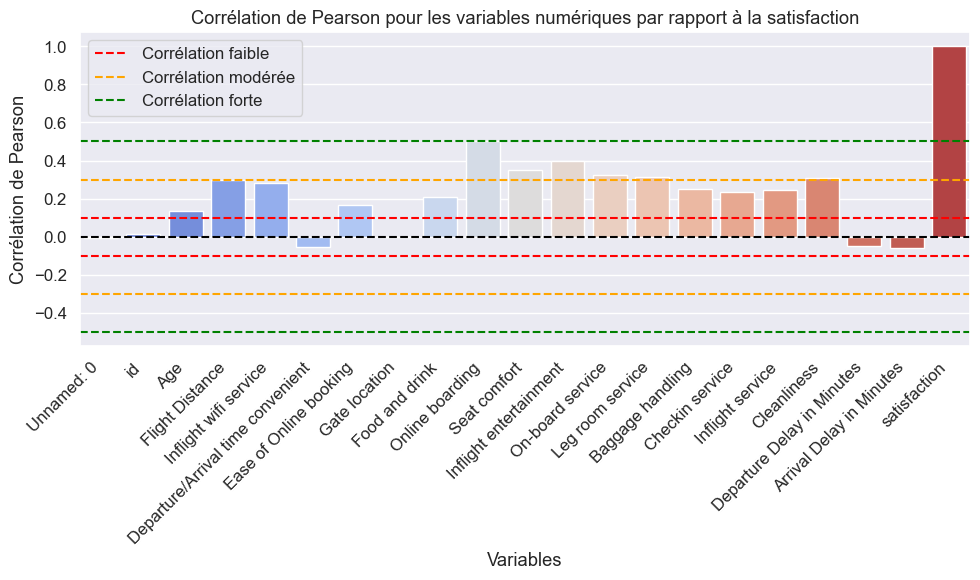

In [ ]:
correlation_results = {}
for col in numerical_cols:
    correlation = df_clean_satisfaction[col].corr(df_clean_satisfaction['satisfaction'])
    correlation_results[col] = correlation

# Conversion des résultats en DataFrame pour la visualisation
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Corrélation de Pearson'])

# Visualisation
plt.figure(figsize=(10, 6), )
sns.barplot(data=correlation_df, x='Variable', y='Corrélation de Pearson', palette='coolwarm')
plt.title("Corrélation de Pearson pour les variables numériques par rapport à la satisfaction")
plt.xlabel("Variables")
plt.ylabel("Corrélation de Pearson")
plt.axhline(0, color='black', linestyle='--')  # Ligne de référence à 0
plt.axhline(0.1, color='red', linestyle='--', label='Corrélation faible')
plt.axhline(0.3, color='orange', linestyle='--', label='Corrélation modérée')
plt.axhline(0.5, color='green', linestyle='--', label='Corrélation forte')
plt.axhline(-0.1, color='red', linestyle='--')
plt.axhline(-0.3, color='orange', linestyle='--')  # Corrélation négative modérée
plt.axhline(-0.5, color='green', linestyle='--')  # Corrélation négative forte
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de 45 degrés
plt.legend()
plt.tight_layout()
plt.show()

###### Corélation de Cramer's des variabbles catégoriques vis à vis de la variable 'satisfaction'

Variable: Gender - Cramér's V: 0.01
Variable: Customer Type - Cramér's V: 0.19
Variable: Type of Travel - Cramér's V: 0.45
Variable: Class - Cramér's V: 0.50


C:\Users\nourn\AppData\Local\Temp\ipykernel_1984\1687223762.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Variable', y="Cramér's V", palette='coolwarm')  # Utilisation de la palette coolwarm


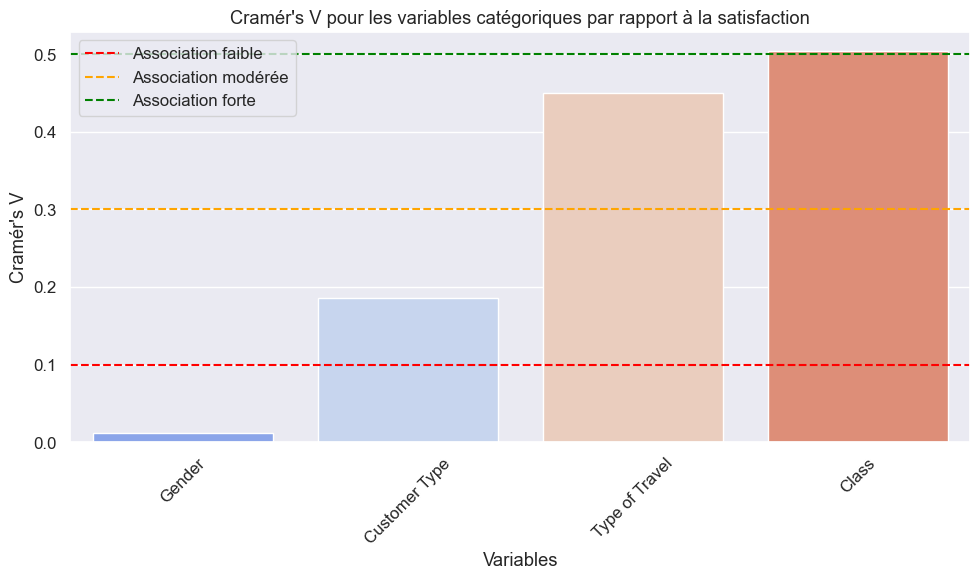

In [ ]:
categorical_cols = df_clean_satisfaction.select_dtypes(exclude='number').columns.tolist()

# Fonction pour calculer le Cramér's V
def cramers_v(contingency_table):
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    return np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))


# Calcul du Cramér's V pour chaque variable catégorique par rapport à 'satisfaction'
results = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(df_clean_satisfaction[col], df_clean_satisfaction['satisfaction'])
    v = cramers_v(contingency_table)
    results[col] = v
    print(f"Variable: {col} - Cramér's V: {v:.2f}")

# Conversion des résultats en DataFrame pour la visualisation
results_df = pd.DataFrame(list(results.items()), columns=['Variable', "Cramér's V"])

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Variable', y="Cramér's V", palette='coolwarm')  # Utilisation de la palette coolwarm
plt.title("Cramér's V pour les variables catégoriques par rapport à la satisfaction")
plt.xlabel("Variables")
plt.ylabel("Cramér's V")
plt.xticks(rotation=45)
plt.axhline(0.1, color='red', linestyle='--', label='Association faible')
plt.axhline(0.3, color='orange', linestyle='--', label='Association modérée')
plt.axhline(0.5, color='green', linestyle='--', label='Association forte')
plt.legend()
plt.tight_layout()
plt.show()


###### Aperçu global du dataset

Feature: Unnamed: 0                          |▍         | [  4%]   00:00 -> (00:04 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

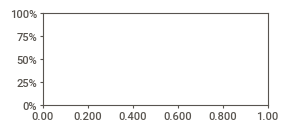

In [ ]:
import sweetviz as sv
rapport = sv.analyze(df_clean_satisfaction)
rapport.show_html('rapport_EDA.html') 

# Baseline

##### Définition de X et y

In [ ]:
X = df_clean_satisfaction.drop(columns=['satisfaction']) #'Unnamed: 0','id' 
X_numeric = X.select_dtypes(include = ['number'])  # Caractéristiques
y = df_clean_satisfaction['satisfaction']   # Cible

In [ ]:
X_numeric.head()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
y

0         0
1         0
2         1
3         0
4         1
         ..
129875    0
129876    1
129877    0
129878    1
129879    0
Name: satisfaction, Length: 129487, dtype: int64

##### Baseline : KNN Classifier

In [ ]:
X, y = X_numeric, y
X_train, X_test, y_train, y_test = train_test_split(
     X,
     y,
     test_size=0.2,
     shuffle=True,
 )
pipeline = Pipeline(steps=[ ('model', KNeighborsClassifier()) ])
X_train, X_test, y_train, y_test = train_test_split(X_numeric, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Entraînement du modèle 
pipeline.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = pipeline.predict(X_test)

# Évaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy (Exactitude): {accuracy:.4f}')

# Affichage du rapport de classification (précision, rappel, F1-score)
print(classification_report(y_test, y_pred))

Accuracy (Exactitude): 0.6021
              precision    recall  f1-score   support

           0       0.63      0.71      0.67     14668
           1       0.55      0.46      0.50     11230

    accuracy                           0.60     25898
   macro avg       0.59      0.59      0.58     25898
weighted avg       0.60      0.60      0.60     25898



Accuracy (Exactitude): 60.21%


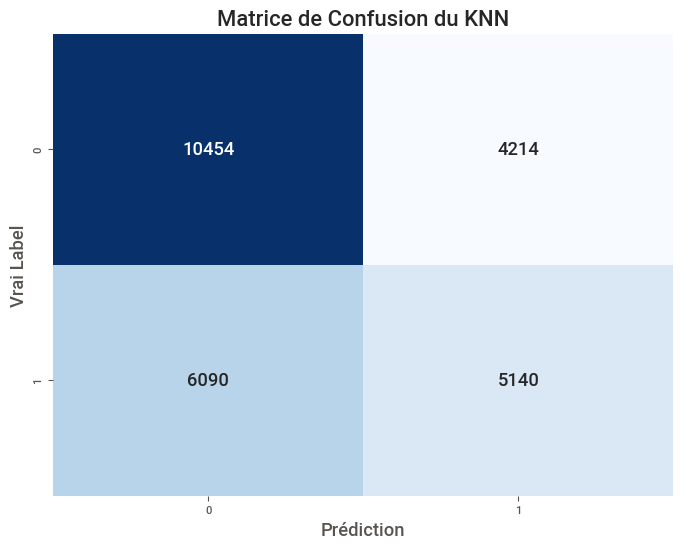

In [ ]:
%matplotlib inline  

accuracy = accuracy_score(y_test, y_pred) * 100  # Pourcentage d'accuracy
print(f'Accuracy (Exactitude): {accuracy:.2f}%')


# Générer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Visualiser la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Prédiction')
plt.ylabel('Vrai Label')
plt.title('Matrice de Confusion du KNN')
plt.show()


## Changement n°1 : Normalisation de la donnée

But : Ramener toutes les caractéristiques sur la même échelle 

Accuracy on test set: 0.9096
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     14668
           1       0.92      0.87      0.89     11230

    accuracy                           0.91     25898
   macro avg       0.91      0.91      0.91     25898
weighted avg       0.91      0.91      0.91     25898



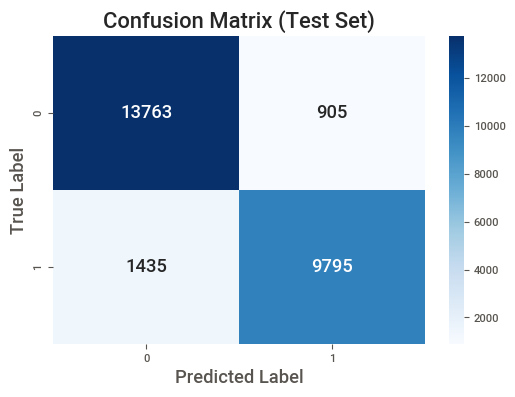

In [ ]:
X, y = X_numeric, y

# Normalisation de la donnée
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
 
knn = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                     test_size=0.2, random_state=42)
# Entraînement du modèle avec le pipeline
knn.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = knn.predict(X_test)

# Accuracy score (test set)
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy_test:.4f}')

# Affichage du rapport de classification (précision, rappel, F1-score)
print(classification_report(y_test, y_pred))

# Compute the confusion matrix on the test set
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Changement 2 : Validation croisée 

Scores de validation croisée pour k=10: [0.90779211 0.91010889 0.91056879 0.90720933 0.91029849]
Moyenne de l'accuracy: 0.9092 ± 0.0014


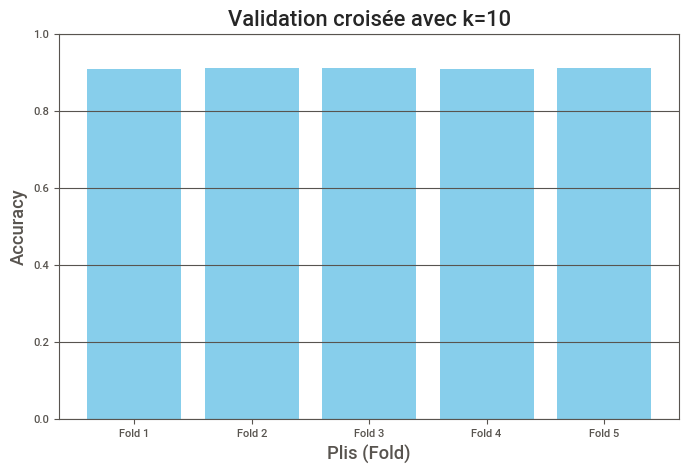

In [ ]:
# Définir le modèle KNN avec k=10 
k_default = 10
knn = KNeighborsClassifier(n_neighbors=k_default)

# Effectuer la validation croisée
scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')  # 5 plis

# Afficher les scores pour chaque pli
print(f'Scores de validation croisée pour k={k_default}: {scores}')
print(f'Moyenne de l\'accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}')

# Tracer les scores de validation croisée
plt.figure(figsize=(8, 5))
plt.bar(range(1, 6), scores, tick_label=[f'Fold {i}' for i in range(1, 6)], color='skyblue')
plt.title(f'Validation croisée avec k={k_default}')
plt.xlabel('Plis (Fold)')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


## Itérations de k 

Itération 1 : k = 10

Accuracy on test set: 0.9093
Classification Report on test set:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     14668
           1       0.93      0.85      0.89     11230

    accuracy                           0.91     25898
   macro avg       0.91      0.90      0.91     25898
weighted avg       0.91      0.91      0.91     25898



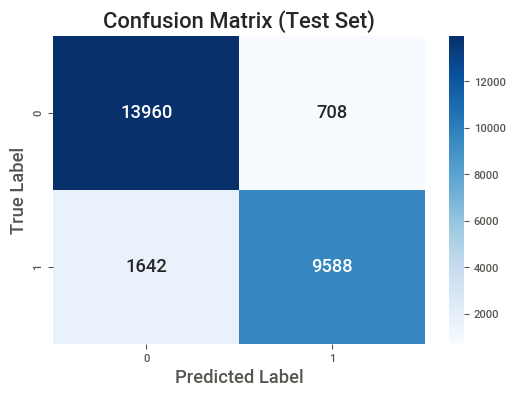

In [ ]:
X, y = X_numeric, y

# Séparer le dataset en utilisant train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
             y, test_size=0.2, shuffle=True, random_state=42)

# Create the KNN classifier with k neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = clf.predict(X_test)

# Compute the accuracy score on the test set
accuracy_testk10 = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set: {accuracy_testk10:.4f}')

# Generate the classification report on the test set
print("Classification Report on test set:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix on the test set
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Amélioration des paramètres - Itération des valeurs de k (n_neighbors)

Accuracy for k=1: 0.8957
Accuracy for k=2: 0.8953
Accuracy for k=3: 0.9088
Accuracy for k=4: 0.9062
Accuracy for k=5: 0.9096
Accuracy for k=6: 0.9091
Accuracy for k=7: 0.9115
Accuracy for k=8: 0.9104
Accuracy for k=9: 0.9124
Accuracy for k=10: 0.9093
Accuracy for k=11: 0.9102
Accuracy for k=12: 0.9081
Accuracy for k=13: 0.9099
Accuracy for k=14: 0.9091
Accuracy for k=15: 0.9102
Accuracy for k=16: 0.9083
Accuracy for k=17: 0.9086
Accuracy for k=18: 0.9082
Accuracy for k=19: 0.9084
Accuracy for k=20: 0.9074


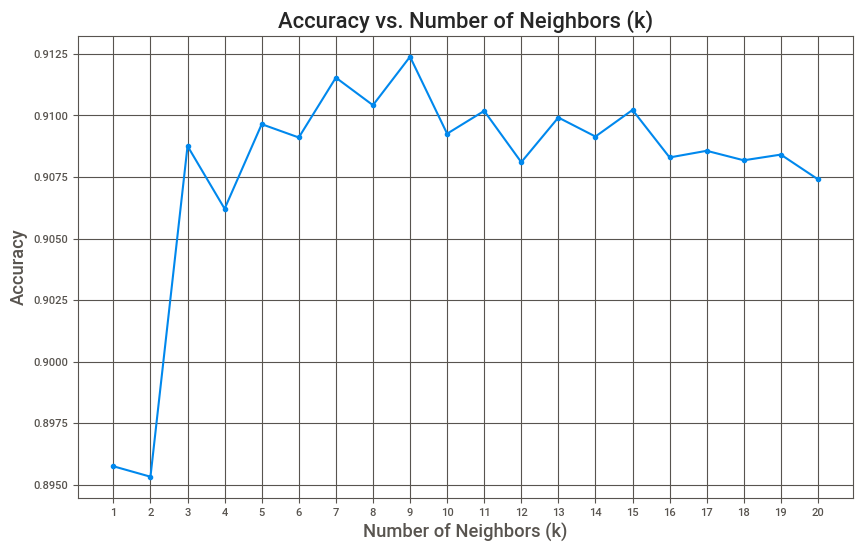

Best k value: 9 with accuracy: 0.9124
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     14668
           1       0.92      0.87      0.90     11230

    accuracy                           0.91     25898
   macro avg       0.91      0.91      0.91     25898
weighted avg       0.91      0.91      0.91     25898



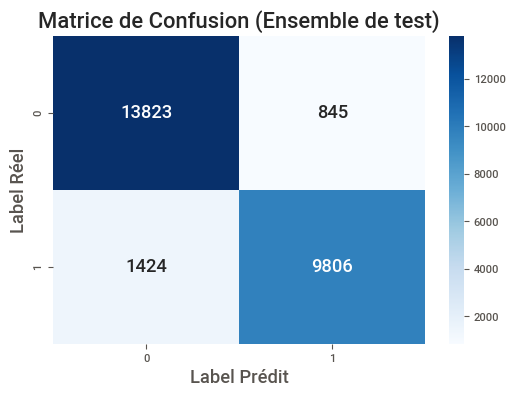

In [ ]:
# Préparer les caractéristiques d'entrée (X) et la variable cible (y)
X, y = X_numeric, y

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=42)

# Liste pour stocker les scores de précision pour différentes valeurs de k
k_values = list(range(1, 21))  # Tester les valeurs de k de 1 à 20
accuracy_scores = []

# Itérer sur les valeurs de k
for k in k_values:
    # Créer le classificateur KNN avec k voisins
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)  # Entraîner le modèle

    # Générer des prédictions sur l'ensemble de test
    y_pred = clf.predict(X_test)

    # Calculer le score de précision sur l'ensemble de test
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    print(f'Accuracy for k={k}: {accuracy:.4f}')

# Tracer les scores de précision pour différentes valeurs de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

# Afficher la meilleure valeur de k basée sur la précision
best_k = k_values[np.argmax(accuracy_scores)]
print(f'Best k value: {best_k} with accuracy: {max(accuracy_scores):.4f}')

# Évaluer le modèle avec le meilleur k sur l'ensemble de test
best_clf = neighbors.KNeighborsClassifier(n_neighbors=best_k)
best_clf.fit(X_train, y_train)
y_test_pred = best_clf.predict(X_test)

# Afficher le rapport de classification sur l'ensemble de test
print("Classification Report for Test Set:")
print(classification_report(y_test, y_test_pred))

# Afficher la matrice de confusion sur l'ensemble de test
cm_train = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion (Ensemble de test)')
plt.xlabel('Label Prédit')
plt.ylabel('Label Réel')
plt.show()



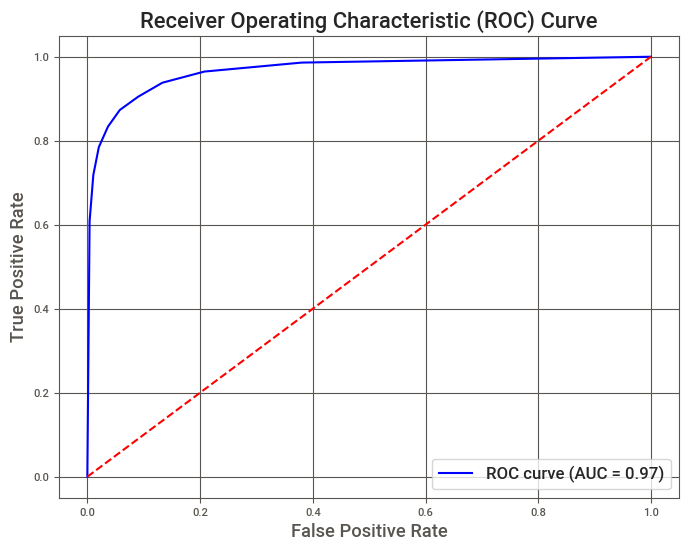

In [ ]:
#from sklearn.metrics import roc_curve, auc

# Prédictions de probabilités pour l'ensemble de test
y_proba = best_clf.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive (1)

# Calculer les valeurs de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # ligne de hasard
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


###### Interprétation de l'AUC de 0.97
###### Excellente Séparation des Classes : le modèle a une capacité très élevée à distinguer entre les classes positives (1) et négatives (0)




##### Amélioration des paramètres - Itération des paramètres 'n_neighbors' & 'weight'

Meilleurs paramètres :  {'n_neighbors': 8, 'weights': 'distance'}
Meilleure précision :  0.9124424649973515
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     14668
           1       0.92      0.88      0.90     11230

    accuracy                           0.91     25898
   macro avg       0.91      0.91      0.91     25898
weighted avg       0.91      0.91      0.91     25898



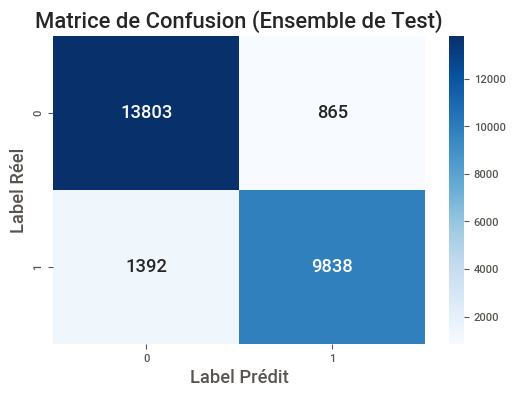

In [ ]:
# Définir le classificateur KNN
knn = neighbors.KNeighborsClassifier()

# Définir les paramètres à tester
param_grid = {
    'n_neighbors': range(1, 21),  # Tester les valeurs de k de 1 à 20
    'weights': ['uniform', 'distance'],  # Tester les poids uniformes et basés sur la distance
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Ajuster le modèle sur l'ensemble d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres : ", grid_search.best_params_)
print("Meilleure précision : ", grid_search.best_score_)

# Évaluer le modèle optimisé sur l'ensemble de test
best_knn = grid_search.best_estimator_
y_test_pred = best_knn.predict(X_test)

# Afficher le rapport de classification sur l'ensemble de test
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Afficher la matrice de confusion sur l'ensemble de test
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion (Ensemble de Test)')
plt.xlabel('Label Prédit')
plt.ylabel('Label Réel')
plt.show()


#### Amélioration des paramètres - Optuna

[I 2024-11-07 10:37:04,922] A new study created in memory with name: no-name-4306eefe-29ca-48be-ae1a-a49586803c87
[I 2024-11-07 10:46:16,026] Trial 0 finished with value: 0.9236984849026854 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 32, 'p': 2, 'algorithm': 'kd_tree'}. Best is trial 0 with value: 0.9236984849026854.
[I 2024-11-07 10:52:13,284] Trial 1 finished with value: 0.9207734581271645 and parameters: {'n_neighbors': 4, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 15, 'p': 2, 'algorithm': 'kd_tree'}. Best is trial 0 with value: 0.9236984849026854.
[I 2024-11-07 10:52:41,792] Trial 2 finished with value: 0.9223373193701059 and parameters: {'n_neighbors': 20, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 39, 'p': 2, 'algorithm': 'auto'}. Best is trial 0 with value: 0.9236984849026854.
[I 2024-11-07 10:55:57,837] Trial 3 finished with value: 0.87004413403204 and parameters: {'n_neighbors': 6, 'weights': 'unif

Meilleurs hyperparamètres :  {'n_neighbors': 10, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 12, 'p': 2, 'algorithm': 'ball_tree'}
Meilleure accuracy :  0.9250692777825563
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     14668
           1       0.92      0.90      0.91     11230

    accuracy                           0.92     25898
   macro avg       0.92      0.92      0.92     25898
weighted avg       0.92      0.92      0.92     25898



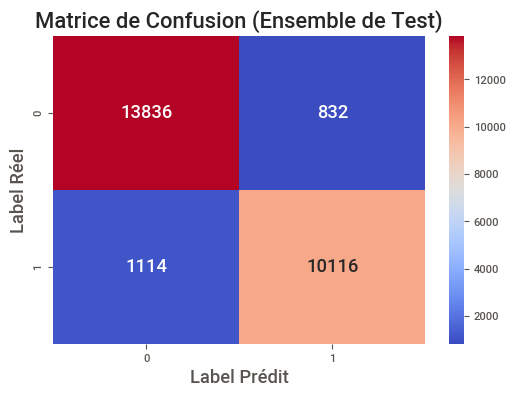

In [33]:
# Diviser le jeu de données une fois avant l'optimisation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

# Définir la fonction objective à optimiser
def objective(trial):
    try:
     # Hyperparamètres à optimiser
     k = trial.suggest_int('n_neighbors', 1, 20)  # Nombre de voisins entre 1 et 20
     weights = trial.suggest_categorical('weights', ['uniform', 'distance'])  # Poids uniformes ou basés sur la distance
     metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'chebyshev'])
     leaf_size = trial.suggest_int('leaf_size', 10, 50)  # Taille des feuilles
     p = trial.suggest_int('p', 1, 2)  # Paramètre pour la distance de Minkowski (1=Manhattan, 2=Euclidean)
     algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])  # Algorithme utilisé
 
     # Création du classificateur KNN avec les paramètres suggérés
     clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric, 
                                leaf_size=leaf_size, p=p, algorithm=algorithm)
 
     # Évaluation du modèle avec validation croisée
     scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy') 
     return scores.mean()  # Retourner la moyenne des scores de validation croisée
    except FloatingPointError:
        return 0 
# Création d'un objet d'étude
study = optuna.create_study(direction='maximize')  # Nous voulons maximiser l'accuracy
study.optimize(objective, n_trials=10)  # Effectuer 10 essais

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", study.best_params)
print("Meilleure accuracy : ", study.best_value)

# Évaluer le meilleur modèle sur l'ensemble de test
best_knn = KNeighborsClassifier(**study.best_params)
best_knn.fit(X_train, y_train)
y_test_pred = best_knn.predict(X_test)

# Afficher le rapport de classification sur l'ensemble de test
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Afficher la matrice de confusion sur l'ensemble de test
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='coolwarm')
plt.title('Matrice de Confusion (Ensemble de Test)')
plt.xlabel('Label Prédit')
plt.ylabel('Label Réel')
plt.show()


In [34]:
import plotly
# Visualisation de l'importance des hyperparamètres
def plot_param_importance(study):
    optuna.visualization.plot_param_importances(study).show()

# Visualisation de la distribution des hyperparamètres
def plot_param_distributions(study):
    optuna.visualization.plot_parallel_coordinate(study).show()

# Tracer la matrice de confusion pour le meilleur modèle
def plot_confusion_matrix(best_knn, X_test, y_test):
    y_pred = best_knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de Confusion (Ensemble de Test)')
    plt.xlabel('Label Prédit')
    plt.ylabel('Label Réel')
    plt.show()

## Prédire avec le meilleur modèle et tracer la matrice de confusion
#best_knn = study.best_trial.user_attrs['model'] 
#plot_confusion_matrix(best_knn, X_test, y_test)

# Afficher les visualisations
plot_param_importance(study)
plot_param_distributions(study)


 ##### Sélection de features + Optuna

In [35]:
df_satisfaction= df_satisfaction.dropna()
df_clean_satisfaction2=df_satisfaction

###### - Ajout et encodage des colonnes 'Type of Travel' et 'Class' 

In [36]:
label_encoder = LabelEncoder()

# Encoder "Type of Travel" avec LabelEncoder
label_encoder = LabelEncoder()
df_clean_satisfaction2['Type of Travel'] = label_encoder.fit_transform(df_clean_satisfaction2['Type of Travel'])

# Encoder "Class" avec OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[['Eco', 'Eco Plus','Business']])  # Spécifiez l'ordre
df_clean_satisfaction2['Class'] = ordinal_encoder.fit_transform(df_clean_satisfaction2[['Class']])

# Afficher le DataFrame encodé
df_clean_satisfaction2.head(5)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,1,1.0,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,0,2.0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,0,2.0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,0,2.0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,0,2.0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [37]:
type_of_travel_classes = label_encoder.classes_

print("Mapping for 'Type of Travel':")
for index, label in enumerate(type_of_travel_classes):
    print(f"Label: '{label}' correspond à l'index: {index}")

# Accéder aux étiquettes originales et à leurs indices pour "Class"
class_categories = ordinal_encoder.categories_[0]  # Récupérer les catégories définies pour 'Class'

print("\nMapping for 'Class':")
for index, label in enumerate(class_categories):
    print(f"Label: '{label}' correspond à l'index: {index}")

Mapping for 'Type of Travel':
Label: 'Business travel' correspond à l'index: 0
Label: 'Personal Travel' correspond à l'index: 1

Mapping for 'Class':
Label: 'Eco' correspond à l'index: 0
Label: 'Eco Plus' correspond à l'index: 1
Label: 'Business' correspond à l'index: 2


In [38]:
X = df_clean_satisfaction2.drop(columns=['satisfaction', 'Unnamed: 0','Age','id','Departure Delay in Minutes','Arrival Delay in Minutes','Departure/Arrival time convenient'  ])
X_numeric2 = X.select_dtypes(include = ['number'])  # Caractéristiques

##### Optuna + selection de features

[I 2024-11-07 11:44:44,743] A new study created in memory with name: no-name-cc8f34d7-3b15-43ff-9d97-8e1fa9e8a6fc
[I 2024-11-07 11:45:51,195] Trial 0 finished with value: 0.9285059350911581 and parameters: {'n_neighbors': 10, 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 19, 'p': 1, 'algorithm': 'kd_tree'}. Best is trial 0 with value: 0.9285059350911581.
[I 2024-11-07 11:47:03,089] Trial 1 finished with value: 0.9020745519202802 and parameters: {'n_neighbors': 11, 'weights': 'uniform', 'metric': 'chebyshev', 'leaf_size': 14, 'p': 2, 'algorithm': 'kd_tree'}. Best is trial 0 with value: 0.9285059350911581.
[I 2024-11-07 11:48:21,404] Trial 2 finished with value: 0.8961472890103422 and parameters: {'n_neighbors': 6, 'weights': 'uniform', 'metric': 'chebyshev', 'leaf_size': 12, 'p': 2, 'algorithm': 'auto'}. Best is trial 0 with value: 0.9285059350911581.
[I 2024-11-07 11:49:25,085] Trial 3 finished with value: 0.938555261767927 and parameters: {'n_neighbors': 7, 'weights': 'uni

Meilleurs hyperparamètres :  {'n_neighbors': 12, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 18, 'p': 2, 'algorithm': 'brute'}
Meilleure accuracy :  0.9398102282613243
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     14668
           1       0.95      0.90      0.93     11230

    accuracy                           0.94     25898
   macro avg       0.94      0.93      0.94     25898
weighted avg       0.94      0.94      0.94     25898



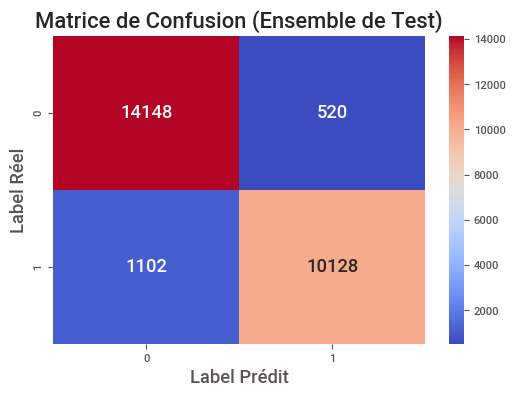

In [39]:
# Préparer les caractéristiques d'entrée (X) et la variable cible (y)
X, y = X_numeric2, y

# Normalisation des données
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X_numeric2)

# Diviser le jeu de données une fois avant l'optimisation
X_train, X_test, y_train, y_test = train_test_split(X_scaled2, y, test_size=0.2, random_state=42, shuffle=True)

# Définir la fonction objective à optimiser
def objective(trial):
    try:
        # Hyperparamètres à optimiser
        k = trial.suggest_int('n_neighbors', 5, 20)  # Nombre de voisins entre 5 et 20
        weights = trial.suggest_categorical('weights', ['uniform', 'distance'])  # Poids uniformes ou basés sur la distance
        metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'chebyshev'])
        leaf_size = trial.suggest_int('leaf_size', 10, 20)  # Taille des feuilles
        p = trial.suggest_int('p', 1, 2)  # Paramètre pour la distance de Minkowski (1=Manhattan, 2=Euclidean)
        algorithm = trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute'])  # Algorithme utilisé

        # Création du classificateur KNN avec les paramètres suggérés
        clf = KNeighborsClassifier(n_neighbors=k, weights=weights, metric=metric, 
                                   leaf_size=leaf_size, p=p, algorithm=algorithm)

        # Évaluation du modèle avec validation croisée
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy') 
        return scores.mean()  # Retourner la moyenne des scores de validation croisée
    except FloatingPointError:
        return 0
# Création d'un objet d'étude
study = optuna.create_study(direction='maximize')  # Nous voulons maximiser l'accuracy
study.optimize(objective, n_trials=30)  # Effectuer 30 essais

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", study.best_params)
print("Meilleure accuracy : ", study.best_value)

# Évaluer le meilleur modèle sur l'ensemble de test
best_knn = KNeighborsClassifier(**study.best_params)
best_knn.fit(X_train, y_train)
y_test_pred = best_knn.predict(X_test)

# Afficher le rapport de classification sur l'ensemble de test
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Afficher la matrice de confusion sur l'ensemble de test
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='coolwarm')
plt.title('Matrice de Confusion (Ensemble de Test)')
plt.xlabel('Label Prédit')
plt.ylabel('Label Réel')
plt.show()


In [40]:
# Visualisation de l'importance des hyperparamètres
def plot_param_importance(study):
    optuna.visualization.plot_param_importances(study).show()

# Visualisation de la distribution des hyperparamètres
def plot_param_distributions(study):
    optuna.visualization.plot_parallel_coordinate(study).show()

# Tracer la matrice de confusion pour le meilleur modèle
def plot_confusion_matrix(best_knn, X_test, y_test):
    y_pred = best_knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matrice de Confusion (Ensemble de Test)')
    plt.xlabel('Label Prédit')
    plt.ylabel('Label Réel')
    plt.show()

# Afficher les visualisations
#plot_study_history(study)
plot_param_importance(study)
plot_param_distributions(study)

## Prédire avec le meilleur modèle et tracer la matrice de confusion
#best_knn = study.best_trial.user_attrs['model2']  # Assurez-vous d'avoir stocké le modèle
#plot_confusion_matrix(best_knn, X_test, y_test)


### Comparaison KNN Classifier et Random Forest
KNN (K-Nearest Neighbors) :
Algorithme non paramétrique et instance-based.
Pour chaque nouvelle donnée à classer, il recherche les 𝑘 voisins les plus proches dans les données d'entraînement, puis assigne la classe majoritaire parmi ces voisins. Il ne construit pas de modèle explicite lors de l'entraînement, il mémorise simplement les données.

Random Forest :
Algorithme ensemble-based et paramétrique.
Il construit plusieurs arbres de décision sur des sous-échantillons des données d'entraînement, puis fait une agrégation (moyenne ou vote majoritaire) des résultats des arbres pour faire la prédiction finale.
Il est basé sur la technique de bagging (Bootstrap Aggregation) pour réduire la variance et améliorer la généralisation.

 # Nouveau modèle : Random forest

Random Forest Accuracy on test set: 0.9514
Random Forest Classification Report on test set:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14647
           1       0.96      0.93      0.94     11251

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



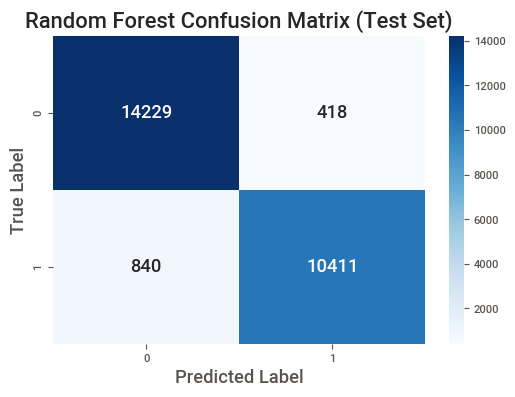

In [41]:
# Diviser les données en ensembl d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, shuffle=True)

# Créer le classificateur Random Forest avec 100 arbres
rf_clf = RandomForestClassifier(n_estimators=100,random_state=42)
rf_clf.fit(X_train, y_train)

### Évaluation sur l'ensemble de test

# Prédire sur l'ensemble de test
y_pred_test_rf = rf_clf.predict(X_test)

# Évaluer la précision sur l'ensemble de test
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(f'Random Forest Accuracy on test set: {accuracy_test_rf:.4f}')

# Afficher le rapport de classification pour l'ensemble de test
print("Random Forest Classification Report on test set:")
print(classification_report(y_test, y_pred_test_rf))

# Afficher la matrice de confusion pour l'ensemble de test
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [42]:
from sklearn.model_selection import cross_val_score
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

scores_rf = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Validation croisée, scores: {scores_rf}")

Validation croisée, scores: [0.94888503 0.94811275 0.94946423 0.94536152 0.94646908]


##### Random Forest - Scaling

Random Forest Accuracy on test set: 0.9487
Random Forest Classification Report on test set:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14711
           1       0.96      0.92      0.94     11187

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



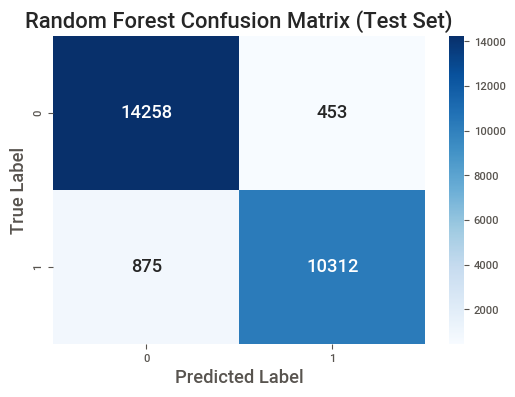

In [43]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True)

# Créer le classificateur Random Forest avec 100 arbres
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

### Évaluation sur l'ensemble de test

# Prédire sur l'ensemble de test
y_pred_test_rf = rf_clf.predict(X_test)

# Évaluer la précision sur l'ensemble de test
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print(f'Random Forest Accuracy on test set: {accuracy_test_rf:.4f}')

# Afficher le rapport de classification pour l'ensemble de test
print("Random Forest Classification Report on test set:")
print(classification_report(y_test, y_pred_test_rf))

# Afficher la matrice de confusion pour l'ensemble de test
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


##### Cross Validation

Cross-validated accuracy scores: [0.94937833 0.95011198 0.9494536  0.95018728 0.95007144]
Mean accuracy: 0.9498 (+/- 0.0003)
Random Forest Classification Report (cross-validation):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     73225
           1       0.96      0.92      0.94     56262

    accuracy                           0.95    129487
   macro avg       0.95      0.95      0.95    129487
weighted avg       0.95      0.95      0.95    129487



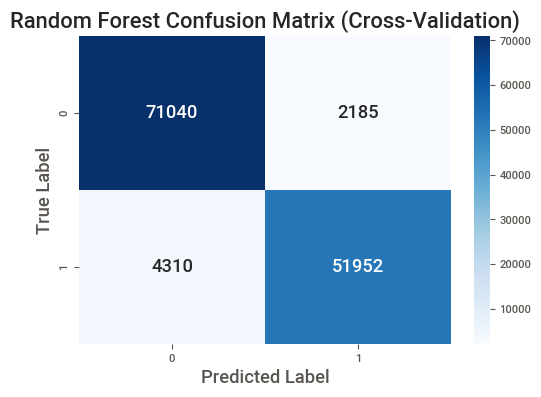

In [44]:
# Créer le classificateur Random Forest avec 100 arbres
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Appliquer la validation croisée avec 5 folds et évaluer la précision
cv_scores = cross_val_score(rf_clf, X_scaled, y, cv=5, scoring='accuracy')
print(f'Cross-validated accuracy scores: {cv_scores}')
print(f'Mean accuracy: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})')

# Utiliser la validation croisée pour obtenir les prédictions
y_pred_cv = cross_val_predict(rf_clf, X_scaled, y, cv=5)

# Afficher le rapport de classification basé sur les prédictions de la validation croisée
print("Random Forest Classification Report (cross-validation):")
print(classification_report(y, y_pred_cv))

# Afficher la matrice de confusion pour la validation croisée
cm_cv_rf = confusion_matrix(y, y_pred_cv)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_cv_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Cross-Validation)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [45]:
# Afficher le rapport de classification pour l'ensemble de test
print("Random Forest Classification Report on test set:")
print(classification_report(y_test, y_pred_test_rf))

Random Forest Classification Report on test set:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     14711
           1       0.96      0.92      0.94     11187

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



##### Random Forest - Grid search + cross validation

In [46]:
# Définir les paramètres à tester
param_grid = {
    'n_estimators': [i for i in range(50, 300, 50)],  # Nombre d'arbres
    'max_depth': [i for i in range(6, 11)],  # Profondeur maximale des arbres
    'min_samples_split': [i for i in range(4, 11, 2)],  # Nombre minimum d'échantillons pour diviser un nœud
    'bootstrap': [True]        # Si on utilise ou non l'échantillonnage Bootstrap
}

# Initialiser le classificateur Random Forest
rf = RandomForestClassifier(random_state=42)

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Exécuter GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_split': 8, 'n_estimators': 250}
Best accuracy found:  0.9326183016156252


Optuna 

In [47]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fonction de l'objectif à minimiser (Optuna va chercher à maximiser cette fonction)
def objective(trial):
    # Hyperparamètres à optimiser
    try:
     n_estimators = trial.suggest_int('n_estimators', 50, 300, step=50)
     max_depth = trial.suggest_int('max_depth', 5, 20)
     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
     bootstrap = trial.suggest_categorical('bootstrap', [True, False])
     
     # Initialisation du modèle RandomForest avec les hyperparamètres choisis
     clf = RandomForestClassifier(
         n_estimators=n_estimators,
         max_depth=max_depth,
         min_samples_split=min_samples_split,
         bootstrap=bootstrap,
         random_state=42
     )
     
     # Utilisation de la validation croisée pour évaluer la performance du modèle
     score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
     
     return score  # Optuna cherche à maximiser cette valeur
    except FloatingPointError:
       return 0

# Étude avec Optuna
study = optuna.create_study(direction='maximize')  # On cherche à maximiser l'accuracy
study.optimize(objective, n_trials=25)  # Effectuer 50 tests 

# Meilleurs paramètres trouvés
print("Best parameters found: ", study.best_params)
print("Best cross-validation accuracy: ", study.best_value)

# Entraîner le modèle avec les meilleurs paramètres trouvés via Optuna
best_params = study.best_params
rf_clf = RandomForestClassifier(**best_params, random_state=42)

# Évaluation finale sur l'ensemble de test
rf_clf.fit(X_train, y_train)  # Entraîner le modèle sur tout l'ensemble d'entraînement
y_pred_test = rf_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Random Forest Accuracy on test set: {accuracy_test:.4f}')

# Afficher le rapport de classification pour l'ensemble de test
print("Random Forest Classification Report on test set:")
print(classification_report(y_test, y_pred_test))

# Afficher la matrice de confusion pour l'ensemble de test
cm_test_rf = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (Test Set)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


[I 2024-11-07 13:04:08,777] A new study created in memory with name: no-name-f1bc7b05-52f3-4c31-bf07-2ea15eb8c079
[I 2024-11-07 13:06:25,267] Trial 0 finished with value: 0.947272395351618 and parameters: {'n_estimators': 250, 'max_depth': 16, 'min_samples_split': 6, 'bootstrap': True}. Best is trial 0 with value: 0.947272395351618.
[I 2024-11-07 13:08:51,010] Trial 1 finished with value: 0.9456699072957889 and parameters: {'n_estimators': 150, 'max_depth': 14, 'min_samples_split': 18, 'bootstrap': False}. Best is trial 0 with value: 0.947272395351618.
[I 2024-11-07 13:09:04,106] Trial 2 finished with value: 0.9193350790419844 and parameters: {'n_estimators': 50, 'max_depth': 8, 'min_samples_split': 7, 'bootstrap': True}. Best is trial 0 with value: 0.947272395351618.
[I 2024-11-07 13:12:37,626] Trial 3 finished with value: 0.9458822834736973 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 5, 'bootstrap': True}. Best is trial 0 with value: 0.947272395351618.

KeyboardInterrupt: 

In [ ]:
# Visualisation de l'importance des hyperparamètres
def plot_param_importance(study):
    optuna.visualization.plot_param_importances(study).show()

# Visualisation de la distribution des hyperparamètres
def plot_param_distributions(study):
    optuna.visualization.plot_parallel_coordinate(study).show()

plot_param_importance(study)
plot_param_distributions(study)




Random Forest - Optuna + sélection des features

In [ ]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled2, y, test_size=0.2, random_state=42)

# Fonction de l'objectif à minimiser (Optuna va chercher à maximiser cette fonction)
def objective(trial):
    try:# Hyperparamètres à optimiser
     n_estimators = trial.suggest_int('n_estimators', 100, 300, step=50)
     max_depth = trial.suggest_int('max_depth', 5, 20)
     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
     bootstrap = trial.suggest_categorical('bootstrap', [True, False])
     
     # Initialisation du modèle RandomForest avec les hyperparamètres choisis
     clf = RandomForestClassifier(
         n_estimators=n_estimators,
         max_depth=max_depth,
         min_samples_split=min_samples_split,
         bootstrap=bootstrap,
         random_state=42
     )
     
     # Utilisation de la validation croisée pour évaluer la performance du modèle
     score = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy').mean()
     
     return score  # Optuna cherche à maximiser cette valeur
    except FloatingPointError:
       return 0
 
# Étude avec Optuna
study = optuna.create_study(direction='maximize')  # On cherche à maximiser l'accuracy
study.optimize(objective, n_trials=30)  # Effectuer 30 tests (trials)

# Meilleurs paramètres trouvés
print("Best parameters found: ", study.best_params)
print("Best cross-validation accuracy: ", study.best_value)

# Entraîner le modèle avec les meilleurs paramètres
best_params = study.best_params
rf_clf = RandomForestClassifier(**best_params, random_state=42)
rf_clf.fit(X_train, y_train)

# Évaluation sur l'ensemble de test
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy on test set: {accuracy:.4f}')


[I 2024-11-07 09:45:57,622] A new study created in memory with name: no-name-cb36418c-e134-4da5-93cf-473ae7d627fe
[I 2024-11-07 09:48:38,959] Trial 0 finished with value: 0.9580843737249829 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 14, 'bootstrap': False}. Best is trial 0 with value: 0.9580843737249829.
[I 2024-11-07 09:49:12,986] Trial 1 finished with value: 0.9225786717152531 and parameters: {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 12, 'bootstrap': True}. Best is trial 0 with value: 0.9580843737249829.
[I 2024-11-07 09:52:07,738] Trial 2 finished with value: 0.9557868336909143 and parameters: {'n_estimators': 250, 'max_depth': 15, 'min_samples_split': 2, 'bootstrap': True}. Best is trial 0 with value: 0.9580843737249829.


In [ ]:
import optuna
from optuna.visualization import plot_parallel_coordinate

# Visualisation des distributions des hyperparamètres
def plot_param_distributions(study):
    plot_parallel_coordinate(study, params=['n_estimators', 'max_depth', 'min_samples_split', 'bootstrap']).show()

# Appel de la fonction pour visualiser les résultats de l'optimisation
plot_param_distributions(study)


In [ ]:
import optuna
from optuna.visualization import plot_param_importances

# Visualisation de l'importance des hyperparamètres
def plot_param_importance(study):
    plot_param_importances(study).show()

# Appel de la fonction pour visualiser l'importance des hyperparamètres
plot_param_importance(study)


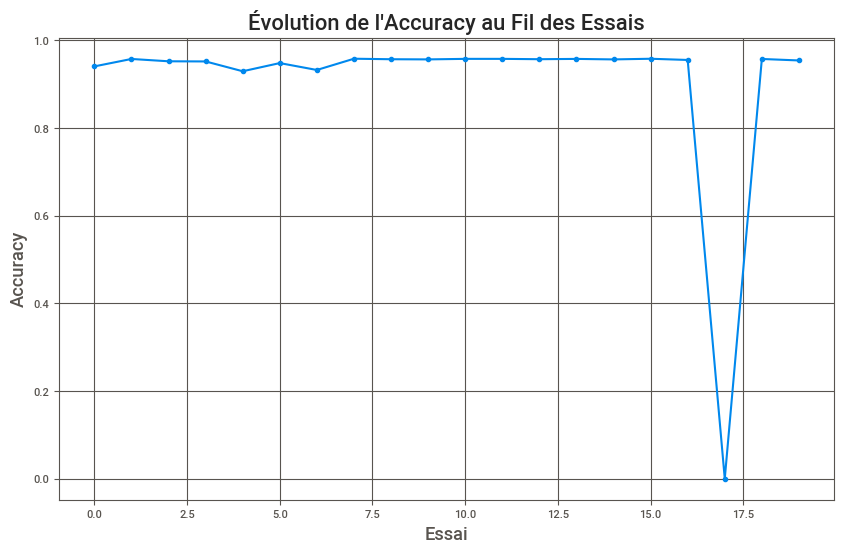

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Visualisation de l'importance des hyperparamètres
def plot_param_importance(study):
    optuna.visualization.plot_param_importances(study).show()

# Visualisation de la distribution des hyperparamètres
def plot_param_distributions(study):
    optuna.visualization.plot_parallel_coordinate(study).show()

plot_param_importance(study)
plot_param_distributions(study)


In [ ]:
# Suppose que tu as les noms des features dans une liste
feature_names = ['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'] 

# Extraire l'importance des features du modèle Random Forest
importances = rf_clf.feature_importances_

# Obtenir les indices des features triés par importance décroissante
indices = np.argsort(importances)[::-1]

# Afficher l'importance des 10 features les plus importantes
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Top 10)")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), np.array(feature_names)[indices[:10]], rotation=90)  # Utilisation de la liste des noms de features
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

##### Model : Gradient boosting

In [11]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_satisfaction, test_size=0.2, random_state=42)
# Drop rows with missing values for 'Arrival Delay in Minutes' since it's a minor portion of the data
train_data_cleaned = df_train.dropna(subset=['Arrival Delay in Minutes'])
test_data_cleaned = df_test.dropna(subset=['Arrival Delay in Minutes'])

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Encode satisfaction (target variable) to binary
label_encoder = LabelEncoder()
train_data_cleaned['satisfaction'] = label_encoder.fit_transform(train_data_cleaned['satisfaction'])
test_data_cleaned['satisfaction'] = label_encoder.transform(test_data_cleaned['satisfaction'])
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
train_data_cleaned = pd.get_dummies(train_data_cleaned, columns=categorical_columns)
test_data_cleaned = pd.get_dummies(test_data_cleaned, columns=categorical_columns)


# Separate features and target
X_train = train_data_cleaned.drop(columns=['satisfaction', 'Unnamed: 0', 'id'])
y_train = train_data_cleaned['satisfaction']
X_test = test_data_cleaned.drop(columns=['satisfaction', 'Unnamed: 0', 'id'])
y_test = test_data_cleaned['satisfaction']

# Train a Gradient Boosting Classifier as a baseline model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train a Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gbc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("accuracy",accuracy)
print("classification_rep",classification_rep)


C:\Users\nourn\AppData\Local\Temp\ipykernel_12548\2828655970.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_cleaned['satisfaction'] = label_encoder.fit_transform(train_data_cleaned['satisfaction'])
C:\Users\nourn\AppData\Local\Temp\ipykernel_12548\2828655970.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_cleaned['satisfaction'] = label_encoder.transform(test_data_cleaned['satisfaction'])


accuracy 0.9397529911231185
classification_rep               precision    recall  f1-score   support

           0       0.94      0.96      0.95     14586
           1       0.95      0.91      0.93     11324

    accuracy                           0.94     25910
   macro avg       0.94      0.94      0.94     25910
weighted avg       0.94      0.94      0.94     25910



##### XGBoost

In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the XGBoost model with default parameters

xgb = XGBClassifier(use_label_encoder=False,
                    eval_metric='logloss')

# Fit the XGBoost model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
classification_report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb}")
print(f"Classification Report:\n {classification_report_xgb}")

c:\Users\nourn\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:04:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9631802392898495
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     14586
           1       0.97      0.94      0.96     11324

    accuracy                           0.96     25910
   macro avg       0.96      0.96      0.96     25910
weighted avg       0.96      0.96      0.96     25910



In [14]:
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': [3, 5, 7],
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Initialize XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up RandomizedSearchCV with XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist,
                                       n_iter=20, scoring='accuracy', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
random_search_xgb.fit(X_train, y_train)

# Get best parameters and the best score
best_params_xgb = random_search_xgb.best_params_
best_score_xgb = random_search_xgb.best_score_

print("best_params_xgb", best_params_xgb)
print ("best_score_xgb", best_score_xgb)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\nourn\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:06:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


best_params_xgb {'colsample_bytree': np.float64(0.9573037160807392), 'learning_rate': np.float64(0.09363463139051822), 'max_depth': 7, 'n_estimators': 200, 'subsample': np.float64(0.8423066203053209)}
best_score_xgb 0.9641233094086209
